In [2]:
%reload_ext autoreload
%autoreload 2
from scrape_GR_tools import *
from scrape_explore import *
#put this in scrape_GR_tools
import pandas as pd

import graphlab as gl

import networkx as nx
import nxpd as nxpd
from IPython.display import display, Image
import community

from datetime import date, datetime
grDateFormat = '%b %d, %Y'

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1479789002.log


This non-commercial license of GraphLab Create for academic use is assigned to ref302@nyu.edu and will expire on October 13, 2017.


In [3]:
client = MongoClient('mongodb://localhost:27017/')

In [14]:
client.database_names()

[u'goodreads_explore_from_book_tnc',
 u'goodreads_explore_multigraph_biased_sampling',
 u'goodreads_explore',
 u'goodreads_full',
 u'goodreads_explore_from_book_mice_and_men',
 u'local',
 u'goodreads_explore_from_book_jest',
 u'goodreads_explore_from_book_swiftly',
 u'goodreads_explore_from_book',
 u'goodreads',
 u'goodreads_explore_multigraph']

In [15]:
db = client['goodreads_explore_from_book_tnc']

In [16]:
db.collection_names()

[u'books', u'comms', u'friends', u'system.indexes']

In [17]:
db['comms'].find_one()

{u'_id': ObjectId('5833cb06cf757c556c51dfce'),
 u'comms': [],
 u'focalBookID': 25503770}

In [18]:
friendsCollection = db['friends']

In [29]:
# get users in graph
userIDlist = []
    
for f in friendsCollection.find():
    userIDlist.append(f['userID'])

# make adjacency dict
adj_dict = {}
for f in friendsCollection.find():
    curFlist = set(f['friends'])
    friendsInData = curFlist & set(userIDlist)
    if len(friendsInData) > 0:
        adj_dict[f['userID']] = list(friendsInData)

# make graph and get connected components
g = nx.from_dict_of_lists(adj_dict)

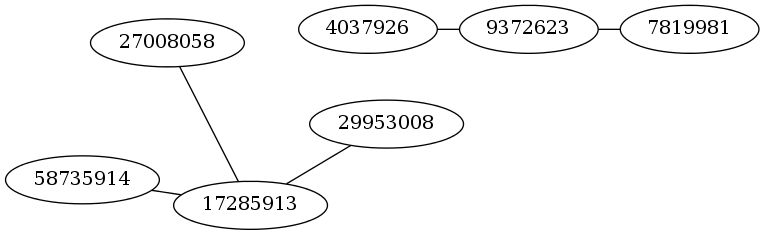

In [30]:
g.graph['overlap'] = False
nxpd.draw(g, layout='neato', show='ipynb')

In [31]:
g.nodes()

[4037926, 58735914, 7819981, 9372623, 29953008, 17285913, 27008058]